<a href="https://colab.research.google.com/github/Chong618/Data-Analysis-with-Python-Peer-Graded-Assignment/blob/main/AAPL_MACD_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the Moving Average Convergence/ Divergence (MACD) crossover to determine when to buy and sell stock.

In [3]:
#Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Give the plot a style
plt.style.use('fivethirtyeight')

In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL99.csv to AAPL99 (1).csv


In [6]:
#Store the data into a df
df = pd.read_csv("AAPL99.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.821369,93278400
1,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.780998,69283600
2,2017-04-24,35.875000,35.987499,35.794998,35.910000,34.106297,68537200
3,2017-04-25,35.977501,36.224998,35.967499,36.132500,34.317619,75486000
4,2017-04-26,36.117500,36.150002,35.845001,35.919998,34.115788,80164800


In [12]:
#Keep the raw database as 'df' and duplicate a copy as 'dfAAPL'. Only edit on dfAAPL so the raw database is untouched.
dfAAPL = df.copy()
dfAAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.821369,93278400
1,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.780998,69283600
2,2017-04-24,35.875000,35.987499,35.794998,35.910000,34.106297,68537200
3,2017-04-25,35.977501,36.224998,35.967499,36.132500,34.317619,75486000
4,2017-04-26,36.117500,36.150002,35.845001,35.919998,34.115788,80164800


In [13]:
#Convert the share prices into post-split prices
dfAAPL['Open1'] = dfAAPL['Open']*4
dfAAPL['High1'] = dfAAPL['High']*4
dfAAPL['Low1'] = dfAAPL['Low']*4
dfAAPL['Close1'] = dfAAPL['Close']*4
dfAAPL['Adj Close1'] = dfAAPL['Adj Close']*4
dfAAPL['Volume1'] = dfAAPL['Volume']/4
dfAAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open1,High1,Low1,Close1,Adj Close1,Volume1
0,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.821369,93278400,141.220000,142.920000,141.160004,142.440004,135.285476,23319600.0
1,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.780998,69283600,142.440004,142.679992,141.850008,142.270004,135.123992,17320900.0
2,2017-04-24,35.875000,35.987499,35.794998,35.910000,34.106297,68537200,143.500000,143.949996,143.179992,143.640000,136.425188,17134300.0
3,2017-04-25,35.977501,36.224998,35.967499,36.132500,34.317619,75486000,143.910004,144.899992,143.869996,144.530000,137.270476,18871500.0
4,2017-04-26,36.117500,36.150002,35.845001,35.919998,34.115788,80164800,144.470000,144.600008,143.380004,143.679992,136.463152,20041200.0


In [14]:
#Remove the original columns that contained pre-split prices
dfAAPL.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], inplace=True)
dfAAPL.head()

,Date,Open1,High1,Low1,Close1,Adj Close1,Volume1
0,2017-04-20,141.220000,142.920000,141.160004,142.440004,135.285476,23319600.0
1,2017-04-21,142.440004,142.679992,141.850008,142.270004,135.123992,17320900.0
2,2017-04-24,143.500000,143.949996,143.179992,143.640000,136.425188,17134300.0
3,2017-04-25,143.910004,144.899992,143.869996,144.530000,137.270476,18871500.0
4,2017-04-26,144.470000,144.600008,143.380004,143.679992,136.463152,20041200.0


In [15]:
#Set the date to be the index
dfAAPL = dfAAPL.set_index(pd.DatetimeIndex(dfAAPL['Date'].values))
dfAAPL

,Date,Open1,High1,Low1,Close1,Adj Close1,Volume1
2017-04-20,2017-04-20,141.220000,142.920000,141.160004,142.440004,135.285476,23319600.0
2017-04-21,2017-04-21,142.440004,142.679992,141.850008,142.270004,135.123992,17320900.0
2017-04-24,2017-04-24,143.500000,143.949996,143.179992,143.640000,136.425188,17134300.0
2017-04-25,2017-04-25,143.910004,144.899992,143.869996,144.530000,137.270476,18871500.0
2017-04-26,2017-04-26,144.470000,144.600008,143.380004,143.679992,136.463152,20041200.0
...,...,...,...,...,...,...,...
2017-08-17,2017-08-17,160.520004,160.710008,157.839996,157.860000,151.140992,27940600.0
2017-08-18,2017-08-18,157.860000,159.500000,156.720000,157.500000,150.796312,27428100.0
2017-08-21,2017-08-21,157.500000,157.890000,155.110000,157.210008,150.518676,26368500.0
2017-08-22,2017-08-22,158.229996,160.000000,158.020004,159.780000,152.979264,21604600.0


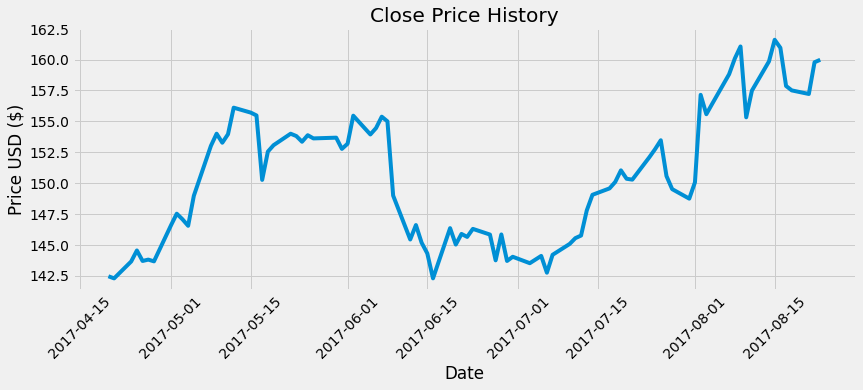

In [19]:
#Visually show the stock prices
plt.figure(figsize=(12.5, 4.5))
plt.plot(dfAAPL['Close1'], label='Close1')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Calculate the MACD and Signal Line Indicators
#Create new column (i.e. ShortEMA) to calculate the short term exponential moving average (EMA), using 12-day close prices
ShortEMA = dfAAPL.Close1.ewm(span=12, adjust=False).mean()
#Calculate the long term exponential moving average
LongEMA = dfAAPL.Close1.ewm(span=26, adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()

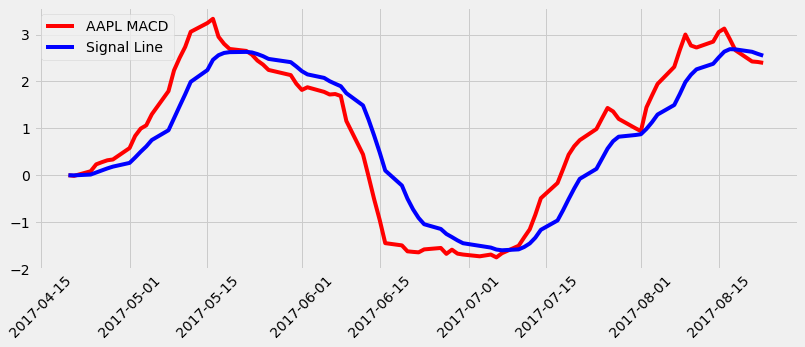

In [25]:
#plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(dfAAPL.index, MACD, label = 'AAPL MACD', color= 'red')
plt.plot(dfAAPL.index, signal, label = 'Signal Line', color='blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [62]:
#Create new columns for the data
dfAAPL['MACD'] = MACD
dfAAPL['Signal Line'] = signal
#show the data
dfAAPL

,Date,Open1,High1,Low1,Close1,Adj Close1,Volume1,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2017-04-20,2017-04-20,141.220000,142.920000,141.160004,142.440004,135.285476,23319600.0,0.000000,0.000000,NaN,NaN
2017-04-21,2017-04-21,142.440004,142.679992,141.850008,142.270004,135.123992,17320900.0,-0.013561,-0.002712,NaN,142.270004
2017-04-24,2017-04-24,143.500000,143.949996,143.179992,143.640000,136.425188,17134300.0,0.085256,0.014881,143.64,NaN
2017-04-25,2017-04-25,143.910004,144.899992,143.869996,144.530000,137.270476,18871500.0,0.232702,0.058446,NaN,NaN
2017-04-26,2017-04-26,144.470000,144.600008,143.380004,143.679992,136.463152,20041200.0,0.277764,0.102309,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-17,2017-08-17,160.520004,160.710008,157.839996,157.860000,151.140992,27940600.0,2.902799,2.688312,NaN,NaN
2017-08-18,2017-08-18,157.860000,159.500000,156.720000,157.500000,150.796312,27428100.0,2.665304,2.683711,NaN,157.500000
2017-08-21,2017-08-21,157.500000,157.890000,155.110000,157.210008,150.518676,26368500.0,2.425725,2.632113,NaN,NaN
2017-08-22,2017-08-22,158.229996,160.000000,158.020004,159.780000,152.979264,21604600.0,2.415390,2.588769,NaN,NaN


In [63]:
#Create a function to signal when to buy and sell the stock
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1 #this shows if the price continues to rise or drop after it crosses a specific pt, flag will only change if two lines cross

  for i in range(0, len(signal)): #it means row 0 to 87
    if signal['MACD'][i] > signal['Signal Line'][i]:
      if flag != 1:
        Buy.append(signal['Close1'][i])
        Sell.append(np.nan)
        flag = 1
      else: 
        Buy.append(np.nan)
        Sell.append(np.nan)

    elif signal['MACD'][i] < signal['Signal Line'][i]:
      if flag != 0:
        Sell.append(signal['Close1'][i])
        Buy.append(np.nan)
        flag = 0
      else: 
        Buy.append(np.nan)
        Sell.append(np.nan)
    else: 
        Buy.append(np.nan)
        Sell.append(np.nan)
  return (Buy, Sell)

In [65]:
#Create Buy and Sell column
a = buy_sell(dfAAPL)
dfAAPL['Buy_Signal_Price'] = a[0]
dfAAPL['Sell_Signal_Price'] = a[1]
dfAAPL.head()

,Date,Open1,High1,Low1,Close1,Adj Close1,Volume1,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2017-04-20,2017-04-20,141.220000,142.920000,141.160004,142.440004,135.285476,23319600.0,0.000000,0.000000,NaN,NaN
2017-04-21,2017-04-21,142.440004,142.679992,141.850008,142.270004,135.123992,17320900.0,-0.013561,-0.002712,NaN,142.270004
2017-04-24,2017-04-24,143.500000,143.949996,143.179992,143.640000,136.425188,17134300.0,0.085256,0.014881,143.64,NaN
2017-04-25,2017-04-25,143.910004,144.899992,143.869996,144.530000,137.270476,18871500.0,0.232702,0.058446,NaN,NaN
2017-04-26,2017-04-26,144.470000,144.600008,143.380004,143.679992,136.463152,20041200.0,0.277764,0.102309,NaN,NaN


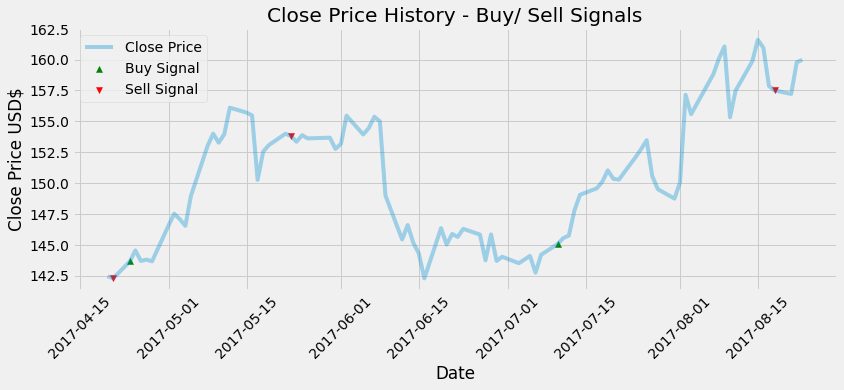

In [79]:
#Visually show the Buy and Sell Signals
plt.figure(figsize=(12.2, 4.5)) 
plt.scatter(dfAAPL.index, dfAAPL['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(dfAAPL.index, dfAAPL['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker='v', alpha=1)
plt.plot(dfAAPL['Close1'], label='Close Price', alpha=0.35)
plt.title('Close Price History - Buy/ Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD$')
plt.legend(loc='upper left')
plt.show()